In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
import sklearn


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Dropout, LSTM, Input,SpatialDropout1D, GlobalMaxPool1D
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn import model_selection
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, precision_score, accuracy_score, recall_score, f1_score
from tensorflow.keras.optimizers import Adam

In [2]:
# 5. Membaca file CSV ke dalam DataFrame
import pandas as pd
df = pd.read_csv('dataset_50k.csv')
df.head()

Unnamed: 0  Label                                         detokenize
0           0      1  aku luka diri aku jalan hidup sulit orang tua ...
1           1      0   buang pikir negatif laku gelisah milik putus asa
2           2      1  jujur aku takut mati aku orang aku sulit paham...
3           3      0              saya mes pasang sepatu jam saya harap
4           4      1  capek hati banget aku allah aku kayak mata ora...

In [3]:
df = df.dropna()
df

Unnamed: 0  Label                                         detokenize
0               0      1  aku luka diri aku jalan hidup sulit orang tua ...
1               1      0   buang pikir negatif laku gelisah milik putus asa
2               2      1  jujur aku takut mati aku orang aku sulit paham...
3               3      0              saya mes pasang sepatu jam saya harap
4               4      1  capek hati banget aku allah aku kayak mata ora...
...           ...    ...                                                ...
50518       50518      0  curi rampok liar begal rakyat senantiasa resah...
50519       50519      0                      saya bicara saya buat tertawa
50520       50520      1  sakit sakit guna sakit bahagia sakit bohong or...
50521       50521      1                              lantai lantai gelisah
50522       50522      1  aku tulis catat kemarin kata tunang aku laku b...

[50523 rows x 3 columns]

In [4]:
df['label'] = df['Label'].apply(lambda x: 0 if x == 0 else 1)
df.head()

Unnamed: 0  Label                                         detokenize  label
0           0      1  aku luka diri aku jalan hidup sulit orang tua ...      1
1           1      0   buang pikir negatif laku gelisah milik putus asa      0
2           2      1  jujur aku takut mati aku orang aku sulit paham...      1
3           3      0              saya mes pasang sepatu jam saya harap      0
4           4      1  capek hati banget aku allah aku kayak mata ora...      1

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vektorisasi teks menggunakan TF-IDF unigram(1,1)
vectorizer = TfidfVectorizer(min_df=10, ngram_range=(1,1), max_df=0.7, max_features=10000)

# Menggunakan fit_transform untuk mengubah dokumen menjadi fitur
vector = vectorizer.fit_transform(df['detokenize']).toarray()
tf_idf_len = len(vectorizer.vocabulary_)

In [6]:
#Split data 80% data train and 20% data test
x_unigram = pd.DataFrame(vector)
label = df["Label"]
x_train, x_test, y_train, y_test =  model_selection.train_test_split(x_unigram,label, test_size = 0.2)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(40418, 3445) (40418,)
(10105, 3445) (10105,)


In [7]:
y_train

15713    0
39757    1
4215     1
28361    1
44952    0
        ..
23187    1
14493    1
20878    0
39880    0
48525    0
Name: Label, Length: 40418, dtype: int64

In [8]:
x_train

0     1     2     3     4     5     6     7     8     9     ...  3435  \
15713   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
39757   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4215    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
28361   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
44952   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
23187   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
14493   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
20878   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
39880   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
48525   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

       3436  3437  3438  3439  3440  3441  3442  3443  3444  
15713   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
39757   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4215    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
28361   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
44952   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
...     ...   ...   ...   ...   ...   ...   ...   ...   ...  
23187   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
14493   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
20878   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
39880   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
48525   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[40418 rows x 3445 columns]

In [9]:
x_train = np.array(x_train).reshape(-1, 1, x_train.shape[1])
x_test = np.array(x_test).reshape(-1, 1, x_test.shape[1])

In [10]:
x_train.shape

(40418, 1, 3445)

In [11]:
import matplotlib.pyplot as plt

def make_plot(history, train, validation, title):
    graph = plt.plot(history.history[train], lw=2.0)
    graph = plt.plot(history.history[validation], lw=2.0)
    graph = plt.title(title)
    graph = plt.legend(['training', 'validasi'])
    graph = plt.show()

    return graph

In [12]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Membuat model lstm
def lstm(x_train, y_train, x_test, y_test):


    model = Sequential()
    model.add(Input(shape=(1,x_train.shape[2])))
    model.add(SpatialDropout1D(0.25))
    model.add(LSTM(128, recurrent_dropout=0.2))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    optimizer = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy',optimizer=optimizer ,metrics=['accuracy'])
    print(model.summary())

    history = model.fit(x_train, y_train, epochs = 10, validation_data=(x_test, y_test), callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)] )

    #Membuat plot garis akurasi
    make_plot(history, "accuracy", "val_accuracy", "Perubahan Akurasi tiap epoch")

    #predict
    predictions = model.predict(x_test)
    print()
    print("Classification Report :")
    print(classification_report(y_test, predictions.round(), digits=6))


    acc_score = accuracy_score(y_test, predictions.round())
    prec_score = precision_score(y_test, predictions.round())
    rec_score = recall_score(y_test, predictions.round())
    f1score = f1_score(y_test, predictions.round())

    return [acc_score,prec_score,rec_score,f1score ]


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ spatial_dropout1d               │ (None, 1, 3445)        │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │     1,829,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,834,049 (7.00 MB)

 Trainable params: 1,834,049 (7.00 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 42s 25ms/step - accuracy: 0.7343 - loss: 0.5065 - val_accuracy: 0.8090 - val_loss: 0.3869
Epoch 2/10
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 81s 37ms/step - accuracy: 0.8169 - loss: 0.3705 - val_accuracy: 0.8183 - val_loss: 0.3718
Epoch 4/10
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 46s 37ms/step - accuracy: 0.8202 - loss: 0.3624 - val_accuracy: 0.8193 - val_loss: 0.3652
Epoch 5/10
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 46s 37ms/step - accuracy: 0.8302 - loss: 0.3463 - val_accuracy: 0.8219 - val_loss: 0.3643
Epoch 6/10
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 48s 38ms/step - accuracy: 0.8324 - loss: 0.3444 - val_accuracy: 0.8241 - val_loss: 0.3696
Epoch 7/10
1227/1264 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8347 - loss: 0.3373

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



1264/1264 ━━━━━━━━━━━━━━━━━━━━ 79s 34ms/step - accuracy: 0.8397 - loss: 0.3261 - val_accuracy: 0.8247 - val_loss: 0.3651
Epoch 10/10
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 30s 24ms/step - accuracy: 0.8439 - loss: 0.3217 - val_accuracy: 0.8249 - val_loss: 0.3662


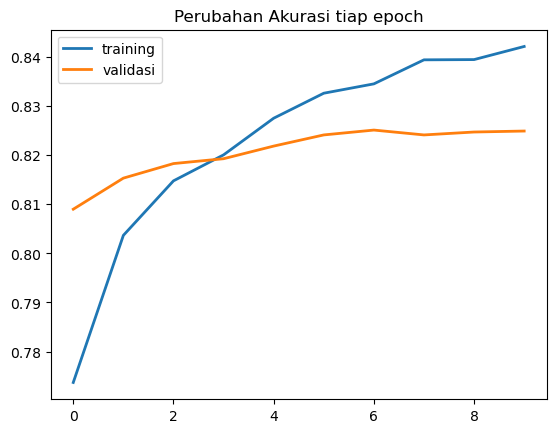

316/316 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step

Classification Report :
              precision    recall  f1-score   support

           0   0.827992  0.815910  0.821907      5003
           1   0.822029  0.833791  0.827868      5102

    accuracy                       0.824938     10105
   macro avg   0.825010  0.824851  0.824887     10105
weighted avg   0.824981  0.824938  0.824917     10105



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ spatial_dropout1d_1             │ (None, 1, 3445)        │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 128)            │     1,829,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,834,049 (7.00 MB)

 Trainable params: 1,834,049 (7.00 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 38s 26ms/step - accuracy: 0.7465 - loss: 0.5073 - val_accuracy: 0.8109 - val_loss: 0.3849
Epoch 2/10
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 30s 23ms/step - accuracy: 0.8038 - loss: 0.3914 - val_accuracy: 0.8107 - val_loss: 0.3795
Epoch 3/10
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 30s 23ms/step - accuracy: 0.8146 - loss: 0.3729 - val_accuracy: 0.8136 - val_loss: 0.3769
Epoch 4/10
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 0.8188 - loss: 0.3607 - val_accuracy: 0.8180 - val_loss: 0.3715
Epoch 5/10
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 27s 21ms/step - accuracy: 0.8255 - loss: 0.3534 - val_accuracy: 0.8252 - val_loss: 0.3660
Epoch 6/10
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 0.8289 - loss: 0.3441 - val_accuracy: 0.8214 - val_loss: 0.3652
Epoch 7/10
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 0.8363 - loss: 0.3366 - val_accuracy: 0.8240 - val_loss: 0.3637
Epoch 8/10
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 27s 21ms/step - accuracy: 0.8

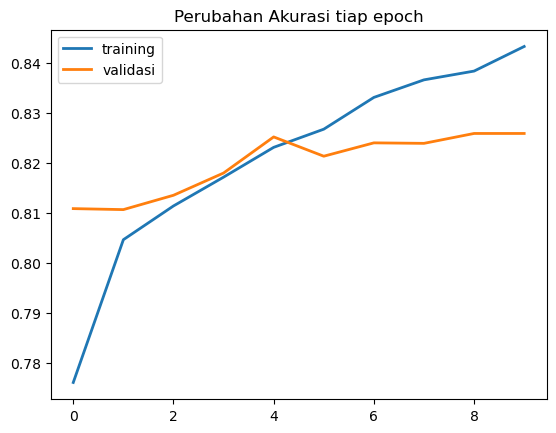

316/316 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step

Classification Report :
              precision    recall  f1-score   support

           0   0.839189  0.802119  0.820235      5003
           1   0.814015  0.849275  0.831271      5102

    accuracy                       0.825928     10105
   macro avg   0.826602  0.825697  0.825753     10105
weighted avg   0.826478  0.825928  0.825807     10105



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ spatial_dropout1d_2             │ (None, 1, 3445)        │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 128)            │     1,829,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,834,049 (7.00 MB)

 Trainable params: 1,834,049 (7.00 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.7455 - loss: 0.5023 - val_accuracy: 0.8115 - val_loss: 0.3876
Epoch 2/10
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 0.8054 - loss: 0.3925 - val_accuracy: 0.8100 - val_loss: 0.3779
Epoch 3/10
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 0.8149 - loss: 0.3704 - val_accuracy: 0.8154 - val_loss: 0.3747
Epoch 4/10
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 0.8150 - loss: 0.3686 - val_accuracy: 0.8184 - val_loss: 0.3708
Epoch 5/10
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 0.8279 - loss: 0.3475 - val_accuracy: 0.8195 - val_loss: 0.3686
Epoch 6/10
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 27s 21ms/step - accuracy: 0.8268 - loss: 0.3481 - val_accuracy: 0.8225 - val_loss: 0.3652
Epoch 7/10
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 0.8356 - loss: 0.3372 - val_accuracy: 0.8235 - val_loss: 0.3642
Epoch 8/10
1264/1264 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 0.8

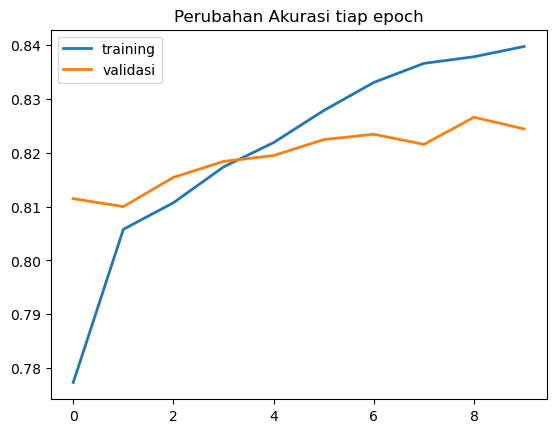

316/316 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step

Classification Report :
              precision    recall  f1-score   support

           0   0.828618  0.813712  0.821097      5003
           1   0.820493  0.834967  0.827667      5102

    accuracy                       0.824443     10105
   macro avg   0.824556  0.824339  0.824382     10105
weighted avg   0.824516  0.824443  0.824414     10105



In [13]:
result = []
result.append(lstm(x_train, y_train, x_test, y_test))
result.append(lstm(x_train, y_train, x_test, y_test))
result.append(lstm(x_train, y_train, x_test, y_test))

In [14]:
average = np.mean(result, axis=0, dtype=float)
print('Average Accuracy  :', average[0])
print('Average Precision :', average[1])
print('Average Recall    :', average[2])
print('Average F1-Score  :', average[3])

Average Accuracy  : 0.8251030842817088
Average Precision : 0.8188455683846564
Average Recall    : 0.839344048085718
Average F1-Score  : 0.8289352133324265
